<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics
    - This is a regression problem, as opposed to a classification problem (on the demo)

### Import libraries

In [6]:
## Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical

In [7]:
print(keras.__version__)
print(keras.__version__)

2.3.0-tf


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [10]:
# insert code here
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [11]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### Prepare input data

In [13]:
# Insert code here
# Using only one feature
X = diabetes.data
n_cols = X.shape[1]

# Output
y = diabetes.target

In [29]:
X.shape

(442, 10)

### Split the data (training/test)

In [14]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3)

### Create the model's architecture

In [25]:
# insert code here
model = Sequential()

# Add first hidden layer, 15 is arbitrary and hyperparameters
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))

# Add second hidden layer, 5 is arbitrary and hyperparameters
model.add(Dense(5, activation = 'relu'))

# Add output layer, use linear because it is regression
model.add(Dense(1, activation = 'linear'))

In [26]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [27]:
# Optimizer tries to minimize the loss function after every epoch
# Depends on if regression, classification, etc

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [ ]:
# Shuffle training data
# from sklearn.utils import shuffle
# X_train2

In [31]:
%%time
# insert code here
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
12/12 [==============================] - 0s 4ms/step - loss: 3148.0967 - mse: 3148.0967 - val_loss: 3054.0188 - val_mse: 3054.0188
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 3143.2349 - mse: 3143.2354 - val_loss: 3052.6655 - val_mse: 3052.6658
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 3139.1565 - mse: 3139.1565 - val_loss: 3051.8376 - val_mse: 3051.8376
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 3132.7542 - mse: 3132.7542 - val_loss: 3046.4062 - val_mse: 3046.4062
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 3128.2344 - mse: 3128.2344 - val_loss: 3043.3257 - val_mse: 3043.3257
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 3125.1934 - mse: 3125.1934 - val_loss: 3034.8088 - val_mse: 3034.8088
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 3118.8728 - mse: 3118.8728 - val_loss: 3031.7771 - val_mse: 3031.7771

Epoch 58/100
12/12 [==============================] - 0s 3ms/step - loss: 2930.6621 - mse: 2930.6621 - val_loss: 2915.1667 - val_mse: 2915.1667
Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 2928.5161 - mse: 2928.5161 - val_loss: 2916.1218 - val_mse: 2916.1218
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 2924.1123 - mse: 2924.1123 - val_loss: 2913.4844 - val_mse: 2913.4844
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 2921.7646 - mse: 2921.7646 - val_loss: 2912.8782 - val_mse: 2912.8782
Epoch 62/100
12/12 [==============================] - 0s 4ms/step - loss: 2918.8191 - mse: 2918.8191 - val_loss: 2911.1855 - val_mse: 2911.1855
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 2915.6548 - mse: 2915.6548 - val_loss: 2911.5911 - val_mse: 2911.5911
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 2913.0491 - mse: 2913.0491 - val_loss: 2910.6179 - val_mse: 29

### Create predictions

In [32]:
# insert code here
predictions = model.predict(X_test)
predictions

array([[210.42567 ],
       [145.6131  ],
       [169.23341 ],
       [189.04912 ],
       [161.34827 ],
       [ 87.5759  ],
       [182.45155 ],
       [148.08649 ],
       [ 99.77563 ],
       [138.84152 ],
       [179.25928 ],
       [104.21896 ],
       [ 99.39872 ],
       [225.84064 ],
       [117.65791 ],
       [ 66.32758 ],
       [ 76.43023 ],
       [200.17012 ],
       [143.34363 ],
       [ 85.95102 ],
       [236.3037  ],
       [161.0139  ],
       [178.36728 ],
       [185.36942 ],
       [177.53143 ],
       [ 61.87175 ],
       [180.43655 ],
       [185.1445  ],
       [216.78984 ],
       [176.34483 ],
       [170.96346 ],
       [143.32849 ],
       [151.74376 ],
       [140.00726 ],
       [243.33179 ],
       [125.31685 ],
       [122.28822 ],
       [194.52815 ],
       [266.62564 ],
       [119.96097 ],
       [241.65417 ],
       [162.26573 ],
       [ 96.06256 ],
       [150.22458 ],
       [ 89.097   ],
       [141.04297 ],
       [210.04454 ],
       [231.7

### Evaluate the model

In [33]:
# insert code here
score = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 814us/step - loss: 3378.2874 - mse: 3378.2874


In [35]:
# Find RMSE
score[0] ** (1/2)

58.12303634115844

In [37]:
y.mean()

152.13348416289594

In [44]:
print(y.min())
print(y.max())

25.0
346.0


### Visualisation of cost

In [48]:
history.history

{'loss': [3148.0966796875,
  3143.23486328125,
  3139.156494140625,
  3132.754150390625,
  3128.234375,
  3125.193359375,
  3118.872802734375,
  3113.949462890625,
  3109.658935546875,
  3105.56494140625,
  3100.68603515625,
  3096.821533203125,
  3092.072998046875,
  3087.48291015625,
  3082.8828125,
  3079.23486328125,
  3075.56298828125,
  3071.63525390625,
  3066.316650390625,
  3061.546875,
  3057.7509765625,
  3053.67919921875,
  3049.756103515625,
  3045.01171875,
  3043.8310546875,
  3036.599609375,
  3033.505859375,
  3030.880126953125,
  3024.953369140625,
  3024.259765625,
  3017.408935546875,
  3016.774658203125,
  3010.118896484375,
  3006.613525390625,
  3003.8896484375,
  3000.151123046875,
  2996.280517578125,
  2993.00732421875,
  2989.150390625,
  2985.282470703125,
  2982.22216796875,
  2979.09912109375,
  2975.524169921875,
  2972.487548828125,
  2968.951416015625,
  2966.1669921875,
  2962.373046875,
  2959.48828125,
  2956.710693359375,
  2953.494384765625,
  2951

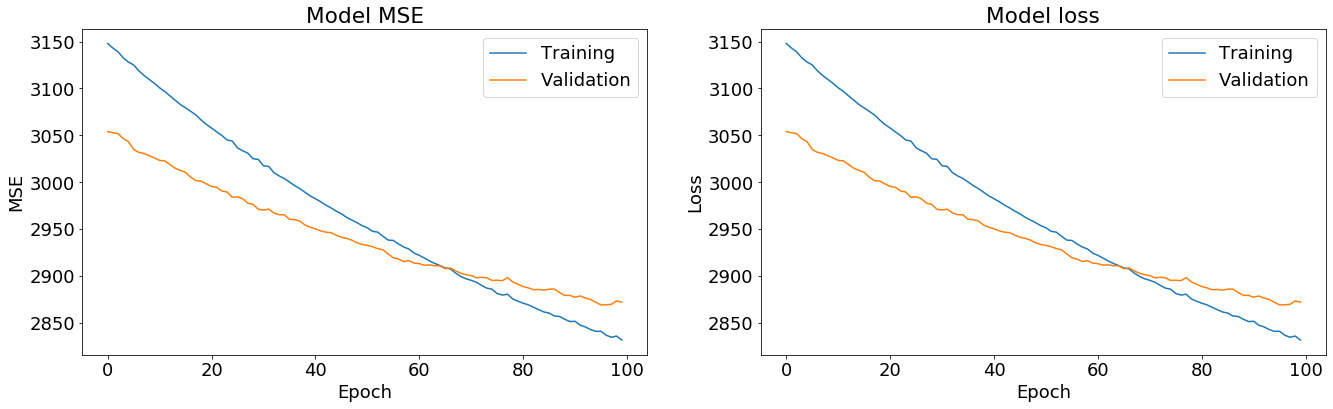

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [45]:
# insert code here
def print_cm(cm):
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

In [46]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### Visualisation of residuals

In [0]:
# insert code here

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



